   duration  protocol_type  service  flag  src_bytes  dst_bytes      land  \
0 -0.112716              1       20     9  -0.007360  -0.004623 -0.014004   
1 -0.112716              2       44     9  -0.007423  -0.004623 -0.014004   
2 -0.112716              1       49     5  -0.007450  -0.004623 -0.014004   
3 -0.112716              1       24     9  -0.007408  -0.002427 -0.014004   
4 -0.112716              1       24     9  -0.007414  -0.004510 -0.014004   

   wrong_fragment    urgent      hot  ...  dst_host_diff_srv_rate  \
0       -0.085118 -0.010425 -0.09417  ...               -0.279291   
1       -0.085118 -0.010425 -0.09417  ...                2.657076   
2       -0.085118 -0.010425 -0.09417  ...               -0.176260   
3       -0.085118 -0.010425 -0.09417  ...               -0.433836   
4       -0.085118 -0.010425 -0.09417  ...               -0.433836   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                     0.084144                    -0.282255

C:\Users\dhyan\AppData\Local\Temp\ipykernel_34392\4189654722.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_binary', data=train, palette="Set2")


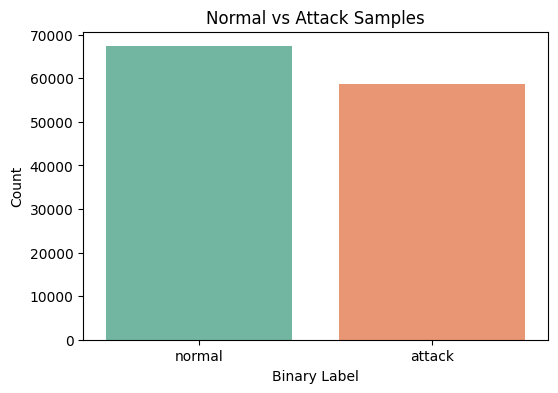

C:\Users\dhyan\AppData\Local\Temp\ipykernel_34392\4189654722.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


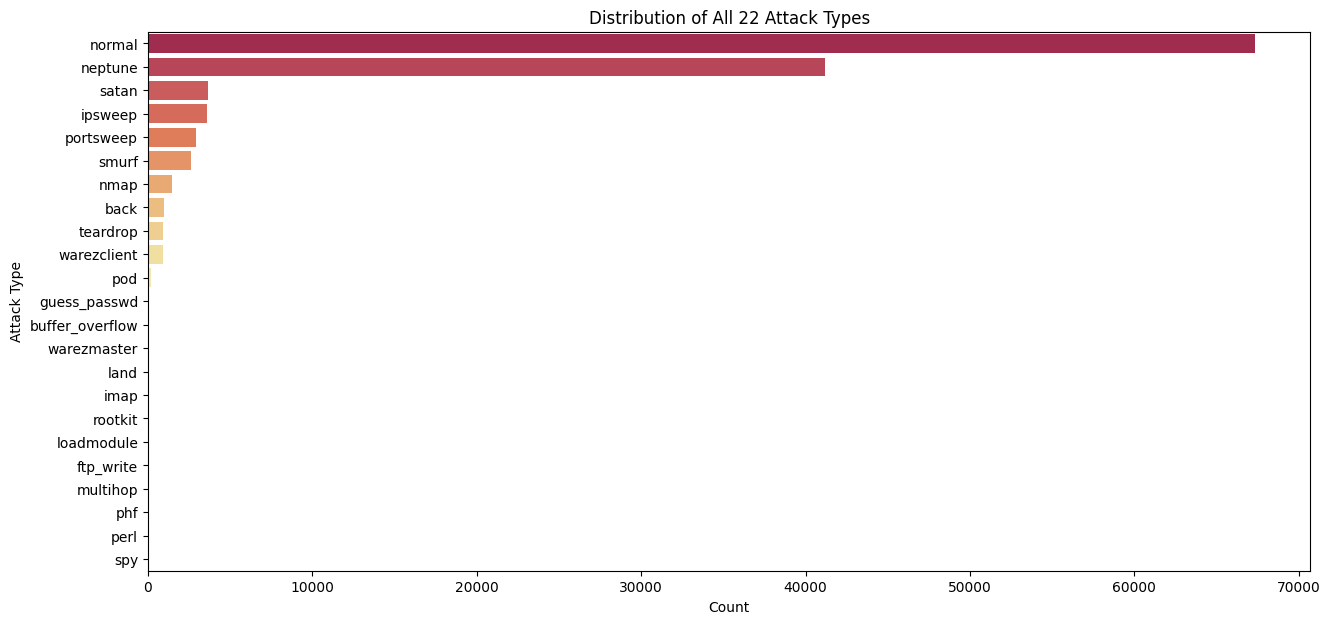

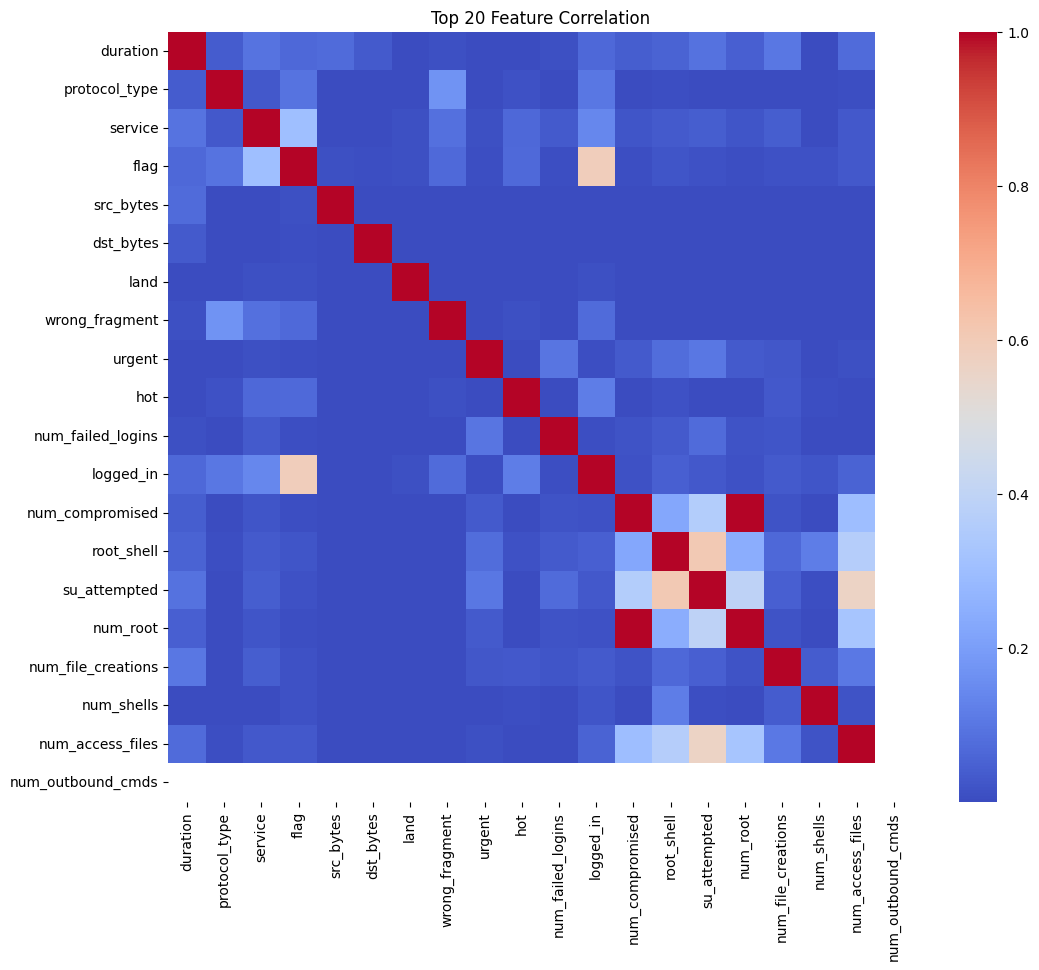

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load updated processed data
train = pd.read_csv("F:\\Master Thesis\\anomaly-ids\\data\\processed\\train_processed.csv")
print(train.head())

# ================== CLASS BALANCE: Normal vs Attack ==================
plt.figure(figsize=(6,4))
sns.countplot(x='label_binary', data=train, palette="Set2")
plt.title("Normal vs Attack Samples")
plt.xlabel("Binary Label")
plt.ylabel("Count")
plt.show()

# =================== Attack Type Distribution ===================
plt.figure(figsize=(15,7))
sns.countplot(
    y='label_attack',
    data=train,
    order=train['label_attack'].value_counts().index,
    palette="Spectral"
)
plt.title("Distribution of All 22 Attack Types")
plt.xlabel("Count")
plt.ylabel("Attack Type")
plt.show()

# =================== Correlation Heatmap (Top 20) ===================
numeric_cols = train.select_dtypes(include=['number']).columns.tolist()

# Remove labels if present
for col in ['label_binary', 'label_attack']:
    if col in numeric_cols:
        numeric_cols.remove(col)

corr = train[numeric_cols].corr().abs()

plt.figure(figsize=(12,10))
sns.heatmap(corr.iloc[:20, :20], cmap="coolwarm")
plt.title("Top 20 Feature Correlation")
plt.show()
